In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food.tail(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
253,Mawa Bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"brown rice, fennel seeds, grated coconut, blac...",vegetarian,NaN,NaN,sweet,dessert,Goa,West


In [3]:
### Preparation time

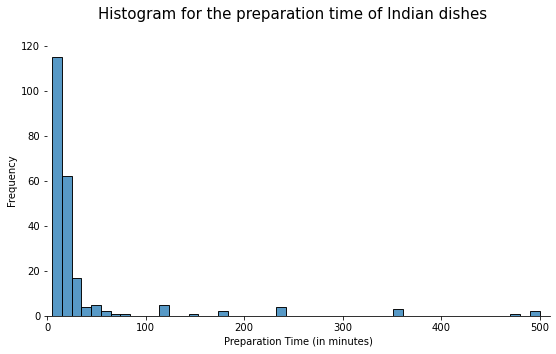

In [4]:
plt.figure(figsize=(9,5))

sns.histplot(indian_food, x="prep_time", bins= 50)

plt.title("Histogram for the preparation time of Indian dishes", fontsize=15, loc='left', y=1.07, x=0.1)
plt.xlabel("Preparation Time (in minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 510)

sns.despine(bottom = False, left = True) # remove frames

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


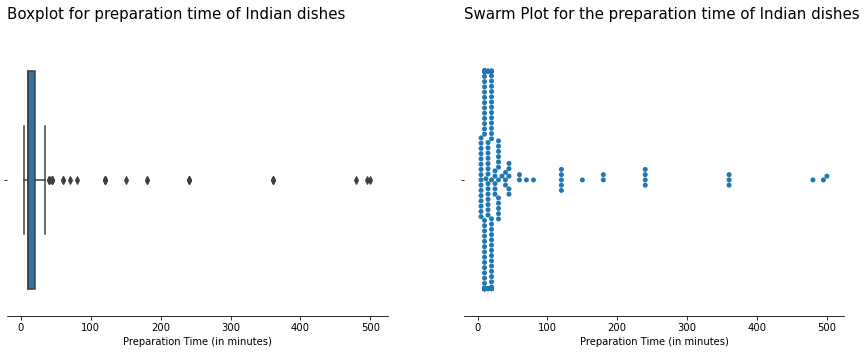

In [5]:
plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1, 2, 1)

ax = sns.boxplot(indian_food['prep_time'], data=indian_food)
plt.title("Boxplot for preparation time of Indian dishes", fontsize=15, loc='left', y=1.07, x=0)
plt.xlabel("Preparation Time (in minutes)")


#plot 2
plt.subplot(1, 2, 2)
ax1 = sns.swarmplot(x=indian_food["prep_time"])

plt.title("Swarm Plot for the preparation time of Indian dishes", fontsize=15, loc='left', y=1.07, x=0)
plt.xlabel("Preparation Time (in minutes)")

sns.despine(bottom = False, left = True) # remove frames

plt.show()

In [6]:
round(indian_food['prep_time'].describe(),1)

count    225.0
mean      35.4
std       76.2
min        5.0
25%       10.0
50%       10.0
75%       20.0
max      500.0
Name: prep_time, dtype: float64

In [7]:
### Cook time

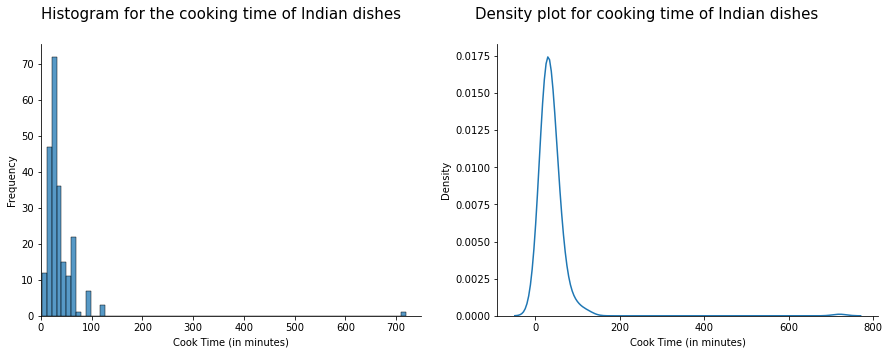

In [8]:
plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1, 2, 1)
sns.histplot(indian_food, x="cook_time", bins=75)

plt.title("Histogram for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Cook Time (in minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 750)


#plot 2
plt.subplot(1, 2, 2)
sns.kdeplot(data=indian_food, x='cook_time')

plt.title("Density plot for cooking time of Indian dishes", fontsize=15, loc='left', y=1.07, x=-0.06)
plt.xlabel("Cook Time (in minutes)")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


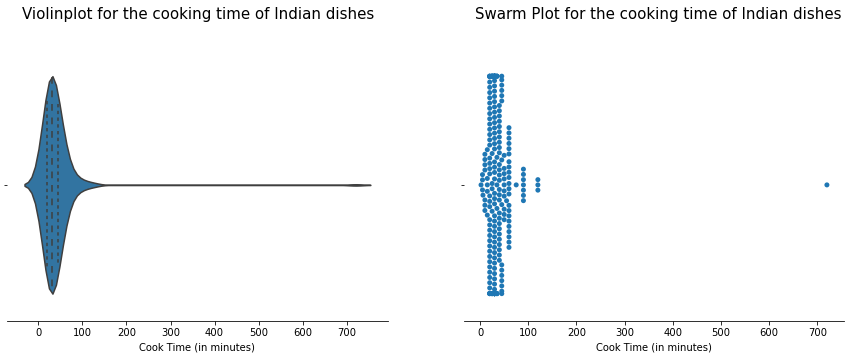

In [9]:
plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1, 2, 1)
sns.violinplot(indian_food['cook_time'], inner="quartile")
plt.title("Violinplot for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.09, x=0.04)
plt.xlabel("Cook Time (in minutes)")

#plot 2
plt.subplot(1, 2, 2)
sns.swarmplot(x=indian_food["cook_time"])

plt.title("Swarm Plot for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.09, x=0.03)
plt.xlabel("Cook Time (in minutes)")

sns.despine(bottom = False, left = True) # remove frames

plt.show()

In [10]:
round(indian_food['cook_time'].describe(),1)

count    227.0
mean      38.9
std       49.4
min        2.0
25%       20.0
50%       30.0
75%       45.0
max      720.0
Name: cook_time, dtype: float64

In [11]:
### Covariance and Variance

In [12]:
round(indian_food.cov(),2)

,prep_time,cook_time
prep_time,5812.70,418.93
cook_time,418.93,2442.51


In [13]:
### Relationship between preparation and cook time

In [14]:
# logarithmic transformation of the prep_time variable
indian_food['log_prep_time'] = np.log10(indian_food['prep_time'])

# logarithmic transformation of the cook_time variable
indian_food['log_cook_time'] = np.log10(indian_food['cook_time'])

indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,log_prep_time,log_cook_time
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,1.653213,1.397940
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,1.903090,1.477121


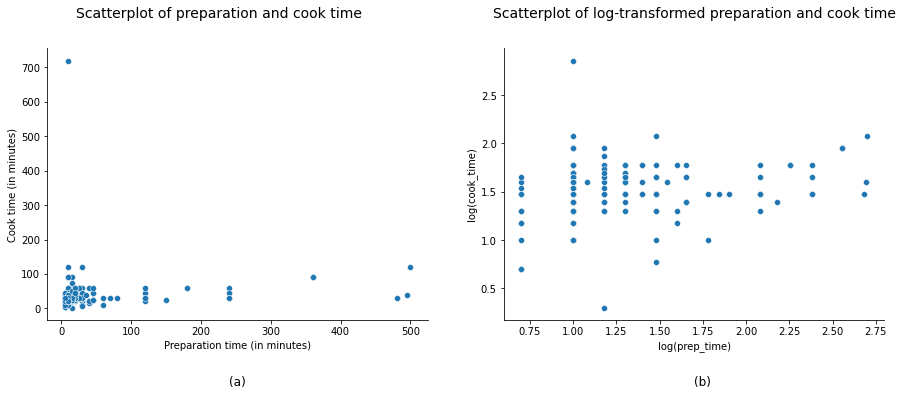

In [15]:
plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1, 2, 1)
ax = sns.scatterplot(x=indian_food["prep_time"], y=indian_food["cook_time"])

plt.title("Scatterplot of preparation and cook time", fontsize=14, y=1.09, x=0.45)
plt.xlabel("Preparation time (in minutes)")
plt.ylabel("Cook time (in minutes)")
ax.text(x=240, y=-225, s='(a)', fontsize=12) # add text

#plot 2
plt.subplot(1, 2, 2)
ax1 = sns.scatterplot(x=indian_food["log_prep_time"], y=indian_food["log_cook_time"])

plt.title("Scatterplot of log-transformed preparation and cook time", fontsize=14, y=1.09, x=0.5)
plt.xlabel("log(prep_time)")
plt.ylabel("log(cook_time)")
ax1.text(x=1.7, y=-0.5, s='(b)', fontsize=12) # add text

sns.despine(bottom = False, left = False) # remove frames

plt.show()

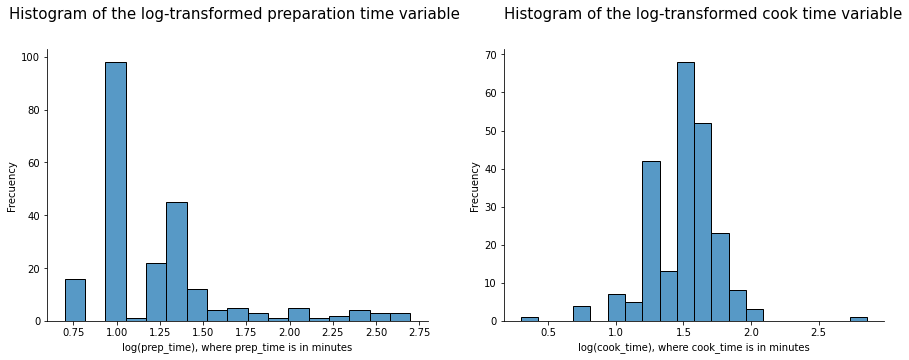

In [16]:
plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1, 2, 1)

sns.histplot(indian_food, x="log_prep_time", bins= 17)

plt.title("Histogram of the log-transformed preparation time variable", fontsize=15, loc='left', y=1.09, x=-0.1)
plt.xlabel("log(prep_time), where prep_time is in minutes")
plt.ylabel("Frecuency")

#plot 2
plt.subplot(1, 2, 2)
sns.histplot(indian_food, x="log_cook_time", bins= 20)

plt.title("Histogram of the log-transformed cook time variable", fontsize=15, loc='left', y=1.09)
plt.xlabel("log(cook_time), where cook_time is in minutes")
plt.ylabel("Frecuency")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

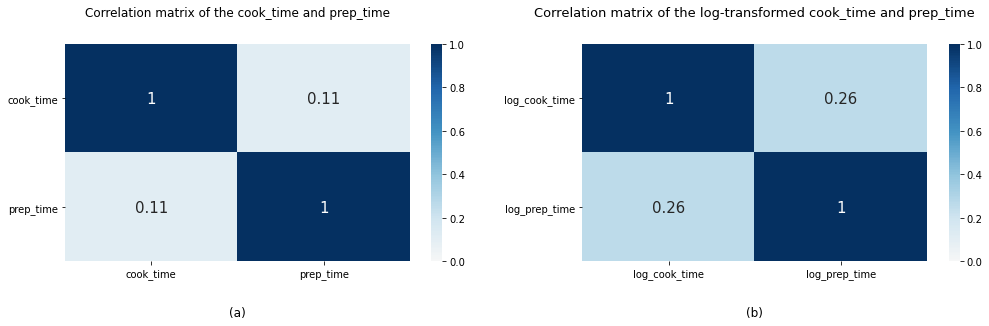

In [17]:
plt.figure(figsize=(17,4))

#plot 1
plt.subplot(1, 2, 1)

ax = sns.heatmap(round(indian_food[['cook_time', 'prep_time']].corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=0, vmax=1,
            annot=True, 
            annot_kws={
                'fontsize':15
            })

plt.title("Correlation matrix of the cook_time and prep_time", y=1.1)
plt.yticks(rotation=360)
ax.text(x=0.95, y=2.5, s='(a)', fontsize=12) # add text

#plot 2
plt.subplot(1, 2, 2)

ax1 = sns.heatmap(round(indian_food[['log_cook_time', 'log_prep_time']].corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=0, vmax=1,
            annot=True, 
            annot_kws={
                'fontsize':15
            })

plt.title("Correlation matrix of the log-transformed cook_time and prep_time", y=1.1, fontsize=13)
plt.yticks(rotation=360)
ax1.text(x=0.95, y=2.5, s='(b)', fontsize=12) # add text

plt.show()

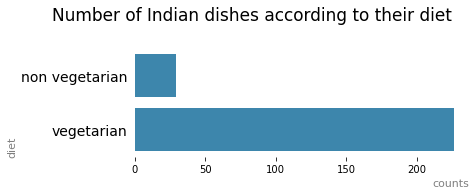

In [22]:
plt.figure(figsize=(6, 2))

ax=sns.countplot(y=indian_food['diet'], data=indian_food, 
                 order = indian_food['diet'].value_counts().index[::-1], 
                 color='#2b8cbe')

ax.tick_params(left=False)
ax.tick_params(axis='y', labelsize=14)  # change font size

plt.title("Number of Indian dishes according to their diet", fontsize=17, y=1.2, x=0.35)
plt.xlabel("counts", loc='right', color='grey', fontsize=11)
plt.ylabel("diet", loc='bottom', color='grey', fontsize=11)

sns.despine(bottom = True, left = True) # remove frames

plt.show()

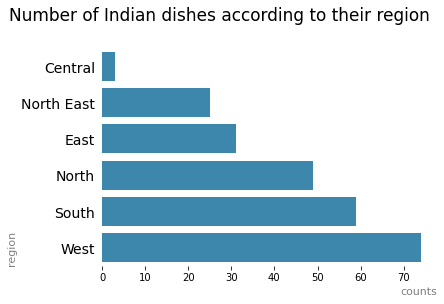

In [26]:
ax=sns.countplot(y=indian_food['region'], data=indian_food, 
                 order = indian_food['region'].value_counts().index[::-1], 
                 color='#2b8cbe')

ax.tick_params(left=False)
ax.tick_params(axis='y', labelsize=14) # change font size

plt.title("Number of Indian dishes according to their region", fontsize=17, y=1.1, x=0.35)
plt.xlabel("counts", loc='right', color='grey', fontsize=11)
plt.ylabel("region", loc='bottom', color='grey', fontsize=11)

sns.despine(bottom = True, left = True) #removes all frames

plt.show()

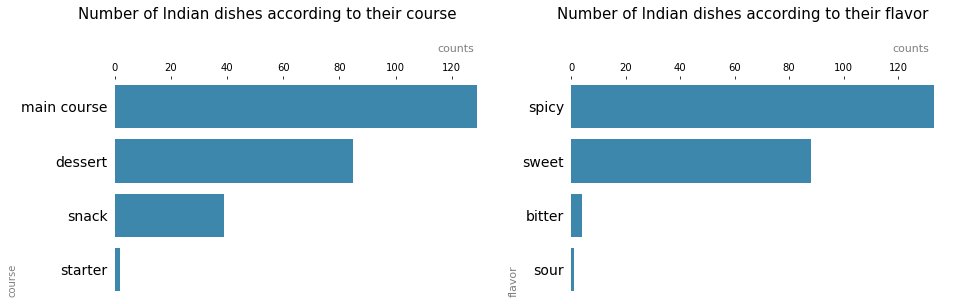

In [27]:
plt.figure(figsize=(15,4))

#plot 1
plt.subplot(1, 2, 1)

ax=sns.countplot(y=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe')

ax.tick_params(left=False)
ax.tick_params(axis='y', labelsize=14) # change font size

plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.25, x=0.4)
plt.xlabel("")
ax.text(x=115, y=-1, s='counts', fontsize=11, color='grey') # add text
plt.ylabel("course", loc='bottom', color='grey')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top() # move x-axis to the top of the plot

#plot 2
plt.subplot(1, 2, 2)

ax=sns.countplot(y=indian_food["flavor_profile"], data=indian_food, 
                 order = indian_food['flavor_profile'].value_counts().index, 
                 color='#2b8cbe')

ax.xaxis.tick_top() # move x-axis to the top of the plot
ax.tick_params(left=False)
ax.tick_params(axis='y', labelsize=14) # change font size

plt.title("Number of Indian dishes according to their flavor", fontsize=15, y=1.25, x=0.45) #, loc='left'
plt.xlabel("counts")
ax.text(x=118, y=-1, s='counts', fontsize=11, color='grey')  # add text
plt.xlabel("")
plt.ylabel("flavor", loc='bottom', color='grey', fontsize=11)

sns.despine(bottom = True, left = True) #removes frames

plt.show()

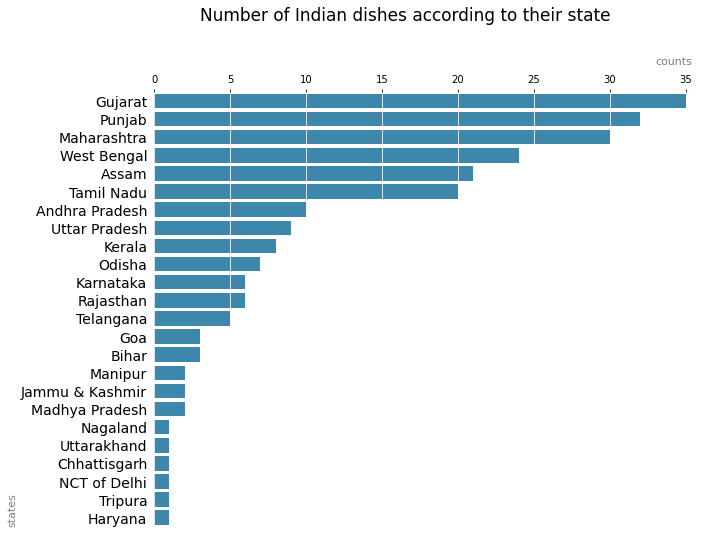

In [30]:
plt.figure(figsize=(10,8))

ax=sns.countplot(y=indian_food['state'], 
                 data=indian_food, 
                 order = indian_food['state'].value_counts().index, 
                 color='#2b8cbe')

sns.despine(bottom = True, left = True) #removes frames
ax.tick_params(left=False)

ax.tick_params(axis='y', labelsize=14) # change font size
plt.grid(axis = 'x', color='white') # add grid and change color
ax.xaxis.tick_top() # move x-axis to the top of the plot

plt.title("Number of Indian dishes according to their state", fontsize=17, y=1.15, x=0.45)
plt.xlabel("")
plt.ylabel("states", loc='bottom', color='grey', fontsize=11) # the ylabel is not visible

ax.text(x=33, y=-2, s='counts', fontsize=11, color='grey') # add text

plt.show()